In [ ]:
# Import library yang digunakan
from google.colab import drive
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
# Menambahkan path yang sesuai
csv_file_path = '/content/drive/MyDrive/multilabel_modified/multilabel_classification(6)-reduced_modified.csv'
images_path = '/content/drive/MyDrive/multilabel_modified/images'

df = pd.read_csv(csv_file_path)

Found 6355 validated image filenames.
Found 1588 validated image filenames.
Epoch 1/10
198/198 [==============================] - ETA: 0s - loss: 0.2352 - accuracy: 0.5328

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


198/198 [==============================] - 2100s 11s/step - loss: 0.2352 - accuracy: 0.5328 - val_loss: 0.4027 - val_accuracy: 0.1569
Epoch 2/10
198/198 [==============================] - 323s 2s/step - loss: 0.1314 - accuracy: 0.6959 - val_loss: 0.2903 - val_accuracy: 0.3125
Epoch 3/10
198/198 [==============================] - 318s 2s/step - loss: 0.1005 - accuracy: 0.7623 - val_loss: 0.2113 - val_accuracy: 0.5619
Epoch 4/10
198/198 [==============================] - 331s 2s/step - loss: 0.0736 - accuracy: 0.8045 - val_loss: 0.3457 - val_accuracy: 0.4681
Epoch 5/10
198/198 [==============================] - 321s 2s/step - loss: 0.0610 - accuracy: 0.8374 - val_loss: 0.3325 - val_accuracy: 0.5427
Epoch 6/10
198/198 [==============================] - 344s 2s/step - loss: 0.0484 - accuracy: 0.8643 - val_loss: 0.4773 - val_accuracy: 0.4911
Epoch 7/10
198/198 [==============================] - 324s 2s/step - loss: 0.0382 - accuracy: 0.8760 - val_loss: 0.3699 - val_accuracy: 0.5733
Epoch 8/

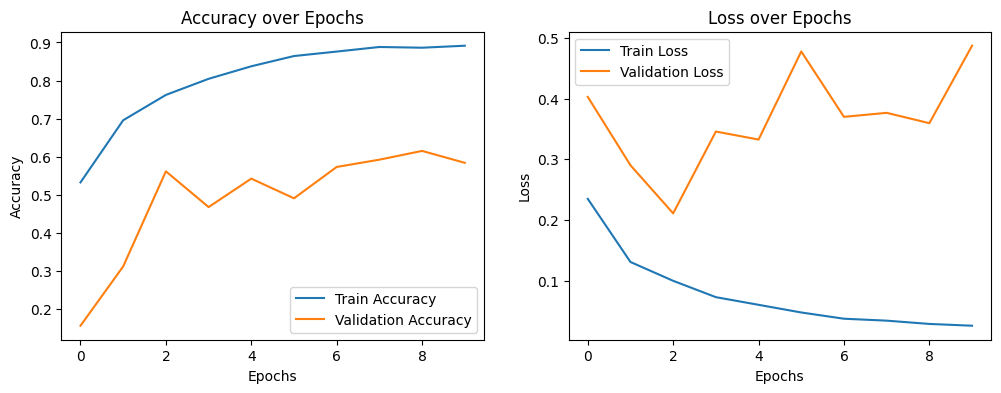

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 128)      

In [ ]:
# Persiapan data dengan ImageDataGenerator
# Menggunakan 20% data untuk validasi
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_path,
    x_col="Image_Name",
    y_col=df.columns[2:].tolist(),
    subset="training",
    class_mode="raw",
    target_size=(128, 128),
    batch_size=32
)

val_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_path,
    x_col="Image_Name",
    y_col=df.columns[2:].tolist(),
    subset="validation",
    class_mode="raw",
    target_size=(128, 128),
    batch_size=32
)

# Membangun model
# Output layer untuk multilabel classification
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(df.columns[2:]), activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Menambahkan callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10,
    callbacks=[checkpoint, early_stop]
)

# Plotting hasil berupa accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

# Rangkuman dari arstektur model yang digunakan
model.summary()
